In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Restaurant_revenue (1).csv')

In [6]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


## Initial Data Exploration 

In [7]:
df.shape

(1000, 8)

In [8]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [10]:
## checking for duplicates 

df.duplicated().sum()

0

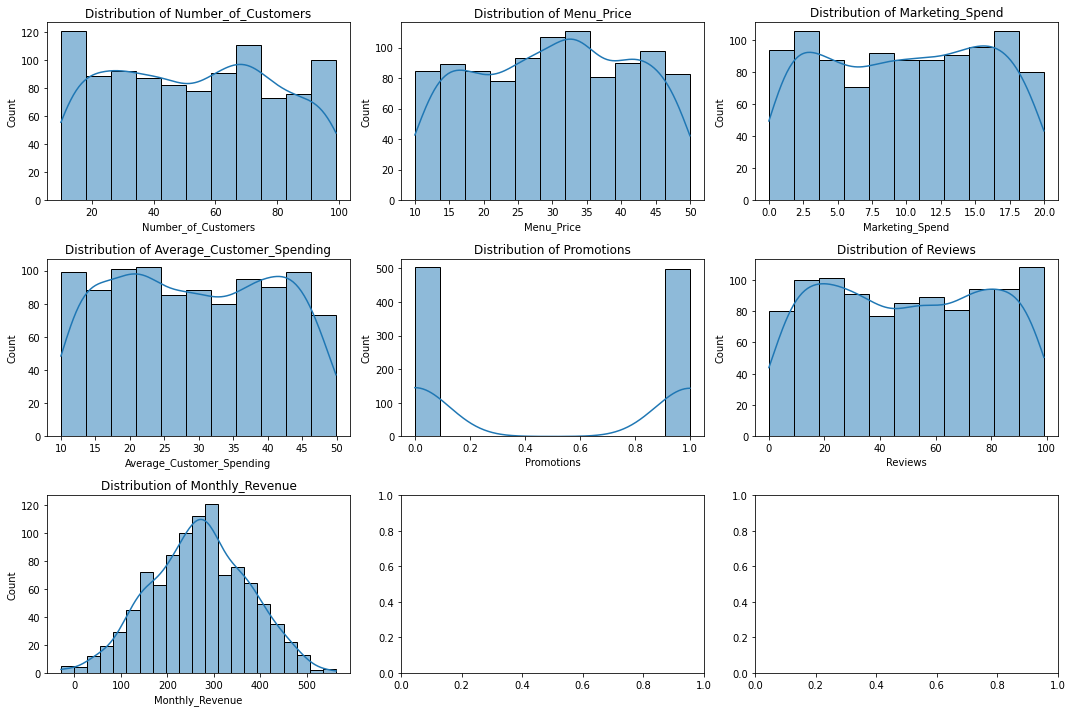

In [12]:
num_cols = list(df.select_dtypes(include = 'number'))

# Plotting the distribution and KDE of numerical features to examine their shape and spread

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  
axes = axes.flatten()
for ix, i in enumerate(num_cols):
    sns.histplot(data=df, x=i, kde=True, ax=axes[ix], palette='Set2')
    axes[ix].set_xlabel(i)
    axes[ix].set_ylabel('Count')
    axes[ix].set_title(f'Distribution of {i}')

plt.tight_layout()
plt.show()


In [13]:
df['Promotions'].value_counts()

Promotions
0    503
1    497
Name: count, dtype: int64

In [14]:
#changing the promotion type to object 
df['Promotions'] = df['Promotions'].astype('object')

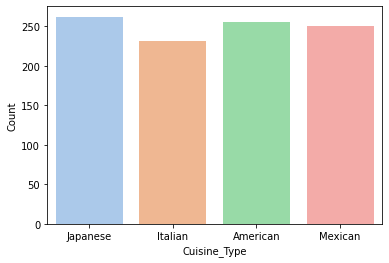

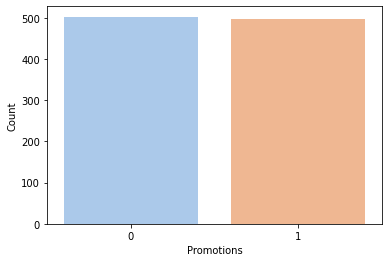

In [16]:
# looking at the distribution of the categorical column

cat_cols = list(df.select_dtypes(include = 'object'))
for i in cat_cols:
    sns.countplot(data = df, x = i  , palette = 'pastel')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [17]:
df.groupby('Cuisine_Type')['Monthly_Revenue'].sum()

Cuisine_Type
American    69018.835189
Italian     61178.367971
Japanese    71185.448715
Mexican     67341.520423
Name: Monthly_Revenue, dtype: float64

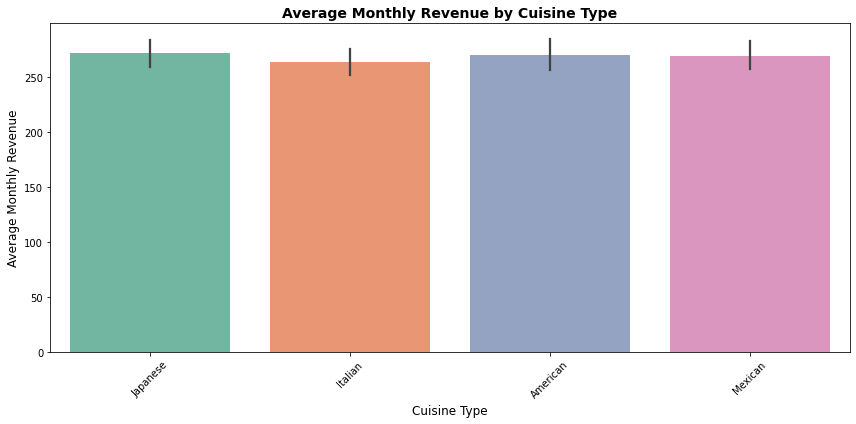

In [18]:
# Barplot of Average Monthly Revenue by Cuisine Type

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Cuisine_Type', y='Monthly_Revenue', palette='Set2', estimator='mean')
plt.title('Average Monthly Revenue by Cuisine Type', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Average Monthly Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

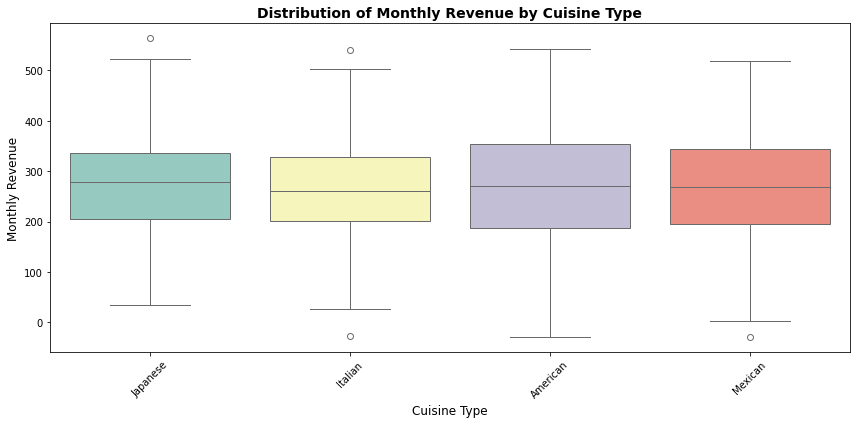

In [19]:
# Boxplot to visualize the distribution of Monthly Revenue by Cuisine Type

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cuisine_Type', y='Monthly_Revenue', palette='Set3')
plt.title('Distribution of Monthly Revenue by Cuisine Type', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Monthly Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


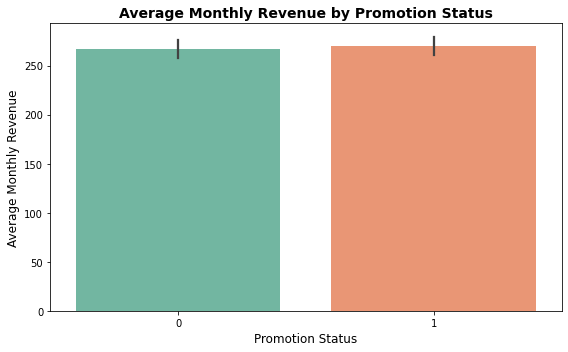

In [20]:
# Barplot showing the impact of Promotions on Average Monthly Revenue

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Promotions', y='Monthly_Revenue', palette='Set2', estimator='mean')
plt.title('Average Monthly Revenue by Promotion Status', fontsize=14, fontweight='bold')
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Average Monthly Revenue', fontsize=12)
plt.tight_layout()
plt.show()


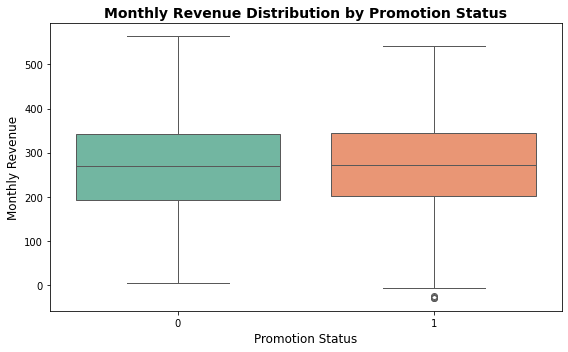

In [21]:
# Boxplot showing the distribution of Monthly Revenue by Promotion Status

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Promotions', y='Monthly_Revenue', palette='Set2')
plt.title('Monthly Revenue Distribution by Promotion Status', fontsize=14, fontweight='bold')
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Monthly Revenue', fontsize=12)
plt.tight_layout()
plt.show()

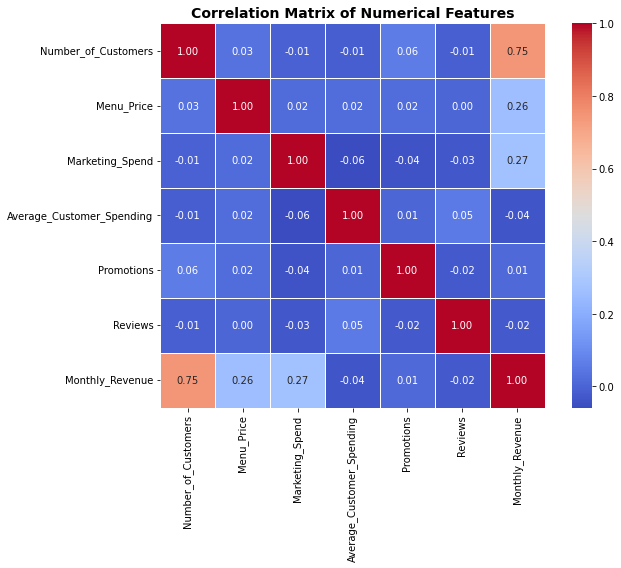

In [22]:
# Heatmap showing correlation between numerical features

plt.figure(figsize=(10, 8))
sns.heatmap(data=df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


There is a strong positive corelation between the Number the customer and the monthly revenue

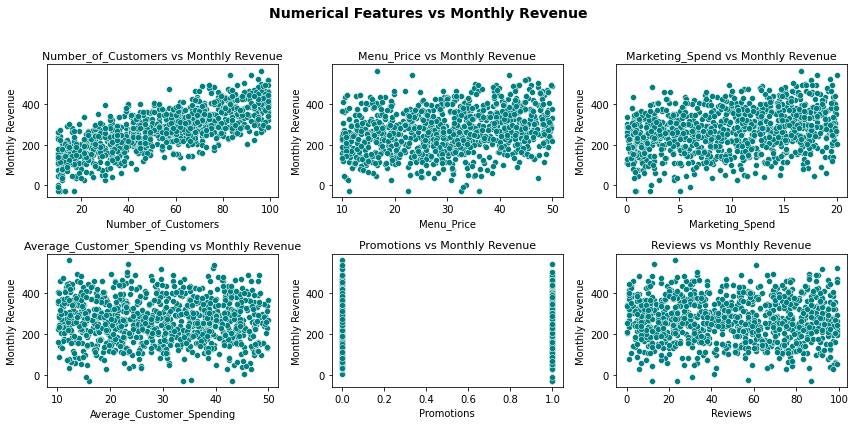

In [23]:
# Scatterplots showing relationships between numerical features and Monthly Revenue

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ix, i in enumerate(num_cols[:6]): 
    sns.scatterplot(data=df, x=i, y='Monthly_Revenue', ax=axes[ix], color='teal')
    axes[ix].set_title(f'{i} vs Monthly Revenue', fontsize=11)
    axes[ix].set_xlabel(i)
    axes[ix].set_ylabel('Monthly Revenue')

plt.suptitle('Numerical Features vs Monthly Revenue', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


# Model 

In [24]:
X = df.drop('Monthly_Revenue', axis=1)
y = df['Monthly_Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [25]:
X


,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,Japanese,36.236133,0,45
1,24,40.020077,4.577892,Italian,17.952562,0,36
2,81,41.981485,4.652911,Japanese,22.600420,1,91
3,70,43.005307,4.416053,Italian,18.984098,1,59
4,30,17.456199,3.475052,Italian,12.766143,1,30
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40
996,31,20.615496,5.822885,Mexican,17.040990,0,57
997,69,17.110656,4.141898,Japanese,44.649315,0,55
998,73,37.664722,3.046556,Japanese,27.767358,0,23


In [26]:
feature_train = X_train[['Cuisine_Type']]
feature_test = X_test[['Cuisine_Type']]

In [27]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_train = encoder.fit_transform(feature_train)
encoded_test = encoder.transform(feature_test)

In [28]:
# Creating  encoded DataFrames
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['Cuisine_Type']), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['Cuisine_Type']), index=X_test.index)

X_train = X_train.drop('Cuisine_Type', axis=1)
X_test = X_test.drop('Cuisine_Type', axis=1)

X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

## Linear Regression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_lr = lr.predict(X_test)

In [36]:
rmse_lr = mean_squared_error(y_test , y_pred_lr , squared = False)
rmse_lr

60.80392754340244

In [51]:
Rsquared_lr = r2_score(y_test, y_pred_lr)
Rsquared_lr

0.6942342956436641

## Random Forest Regression 

In [37]:
rf = RandomForestRegressor(
    n_estimators= 100,
    max_depth= 5, 
    random_state = 1 
)

In [38]:
rf.fit(X_train , y_train)


RandomForestRegressor(max_depth=5, random_state=1)

In [39]:
y_pred_rf  = rf.predict(X_test)

In [40]:
rmse_rf = mean_squared_error(y_test, y_pred_rf , squared = False)
rmse_rf

64.21515526882521

In [26]:
Rsquared_rf = r2_score(y_test, y_pred_rf)
Rsquared_rf

0.6589637216360189

## Ridge Regression

In [41]:
ridge = Ridge()

In [42]:
param_grid = {'alpha' :[0.01, 0.1, 1, 10, 100]}

In [43]:
ridge_cv = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

ridge_cv.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [44]:
y_pred_rdg = ridge_cv.predict(X_test)

In [45]:
rmse_rdg  = mean_squared_error(y_test, y_pred_rdg, squared = False)
rmse_rdg

60.67577953695988

In [46]:
r2_score(y_test, y_pred_rdg)

0.6955217774385298

## Lasso Regression 

In [47]:
# Define Lasso model
lasso = Lasso()

# Param grid with float values
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Grid search
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error')

In [48]:
y_pred_lso = lasso_cv.predict(X_test)

In [49]:
rmse  = mean_squared_error(y_test, y_pred_lso, squared = False)
rmse

60.59047651878464

In [50]:
r2_score(y_test, y_pred_lso)

0.6963772968606152